In [1]:
# Cargamos a nuestro entorno de trabajo las librerias necesarias.

from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report


In [9]:
# Cargamos la información del CSV en una variable llamada data

data = pd.read_csv("datasets/framingham.csv",sep=",")


# Exploración de los datos
#data.columns
#data.info
#data.describe
data.head

<bound method NDFrame.head of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0          

In [11]:
#Sustituimos los valores nulos por 0
data = data.fillna(0)

In [13]:
#Creamos el modelo de la regresion logistica
modelo=LogisticRegression(max_iter=1000,solver='liblinear')

In [15]:
#Definimos las filas y columnas que vamos a trabajar
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [17]:
#Asignamos las variables de entrenamiento y test (asignado 10% al test)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [19]:
#La funcion fit de la libreria sklearn para hacer la estimacion
modelo.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [21]:
#Cargamos en la variable el array resultante de la funcion predict
y_pred=modelo.predict(X_test)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
#Desde la libre numpy corremos en un array resultante de las varaibles de entrenamiento
np.array(modelo.predict(X_train)-y_train)

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
#Calculo de el error residual de las variables de entrenamiento
modelo.score(X_train,y_train)

0.854745673833246

array([[353,   1],
       [ 66,   4]])

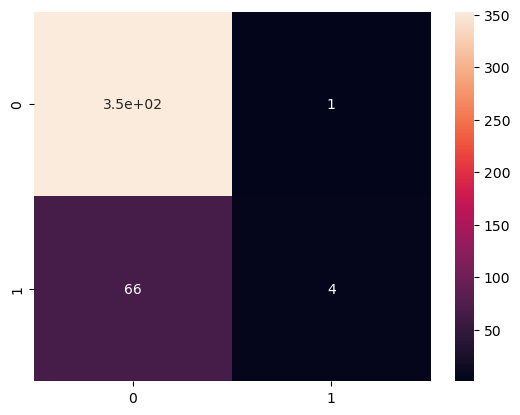

In [31]:
#calculo y grafico de la matriz de confusion
mat=confusion_matrix(y_test,y_pred)

sns.heatmap(mat.astype(int),annot=True)
mat

In [33]:
#Reporte de la predicion, test
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       354
           1       0.80      0.06      0.11        70

    accuracy                           0.84       424
   macro avg       0.82      0.53      0.51       424
weighted avg       0.84      0.84      0.78       424



<Axes: xlabel='age', ylabel='Count'>

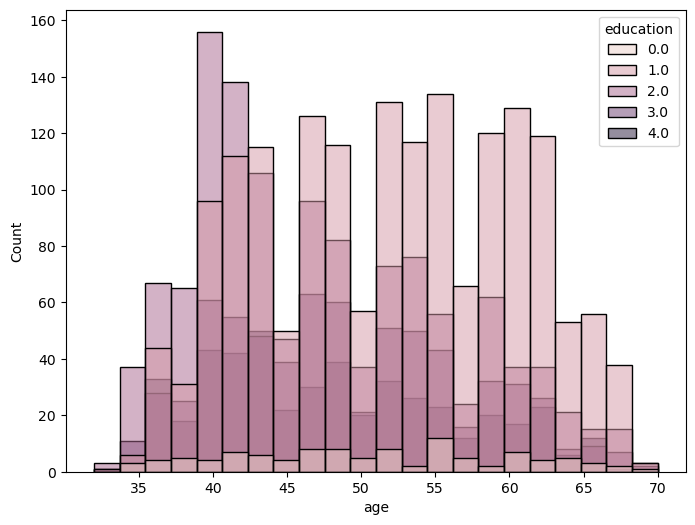

In [35]:
#Histograma de la variable "age" con descripcion de "education"
plt.figure(figsize=(8,6))
sns.histplot(x="age",data=data,hue="education")